<a href="https://colab.research.google.com/github/The-DarK-os/Neural-networks/blob/main/IET_Saama_Hackathon_Problem_Statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IET-SAAMA-Hackathon - Computer Vision**

## **Problem Statements Description**
This hackathon consists of 2 problem statements and a team can choose 1 among the 2 problem statements and submit the solution as a colab notebook.



### **Problem Statement 1 - Computer Vision**
To segment/detect/recognise dents/scratches from images of cars. There are 2 datasets within this same problem statement and a team can choose any one amonth the two datasets and submit the solution.

[Dataset 1](https://drive.google.com/drive/folders/1vqgdNwGXLcMwY4D_y7QAI6Fn1Z4urpSX?usp=sharing)

[Dataset 2](https://drive.google.com/drive/folders/1lgptx7vJPVd5s5ny3hyK5hWKJYaoN943?usp=sharing)

# Dataset 1 - Description
#### Context
The dataset contains car images with one or more damaged parts. The img/ folder has all 80 images in the dataset. There are three more folders train/, val/ and test/ for training, validation and testing purposes respectively.

#### Folders

##### train/:

- Contains 59 images.
- COCO_train_annos.json: Train annotation file for damages where damage is the one and only category.
- COCO_mul_train_annos.json: Train annotation file for parts having damages. There are five categories of parts based on which part the damage has happened. The parts can be namely, headlamp, front_bumper, hood, door, rear_bumper.

##### val/:

- Contains 11 images.
- COCO_val_annos.json: Validation annotation file for damages where damage is the one and only category.
- COCO_mul_val_annos.json: Validation annotation file for parts having damages. There are five categories of parts based on which part the damage has happened. The parts can be namely, headlamp, front_bumper, hood, door, rear_bumper.


##### Annotation files have the following keys:
"annotations": Contains the bounding box and segmentation array.
"categories": Contains the list of categories in the annotation.
"images": Details of each image used in the annotation.
"info": Creator information
"licenses": License information



# Dataset 2 - Description
 
#### Folders

##### training/00-damage/:
Contains 920 images - Cars having a dent

##### training/01-whole/:
Contains 920 images - Cars not having a dent

##### validation/00-damage/:
Contains 230 images - Cars having a dent

##### validation/01-whole/:
Contains 230 images - Cars not having a dent




# Submission
The submission must include


1.   Colab notebook
2.   Trained model
3.   A csv file with columns having image name and your prediction(for dataset  coordinates)(for dataset 2 - the detected class)



### **Problem Statement 2 - Natural Language Processing**

#### Overview
Adverse Event is a side effect that is displayed upon the subjects (volunteers for the clinical
study trial) when they are administered with the relevant study drug. This problem is about
finding data records which have medically/logically similar adverse event terms.

#### Description
Provided the medical dataset, the solution function should take 2 adverse events name as input and output whether they are logically matched or not.

### Dataset
Refer to publicly available medical dataset in the internet (Open PubMed datasets) - [Dataset 1](https://pubmed.ncbi.nlm.nih.gov/download/)

# Submission
The submission must include


1.   Colab notebook
2.   Trained model
3.   A function that takes in 2 adverseevent names and gives and output whether they are a logical match(NOTE : this function must use the trained model)

In [1]:
import zipfile
with zipfile.ZipFile("data.zip") as zip_ref:
  zip_ref.extractall()

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,LearningRateScheduler
from tensorflow.keras.preprocessing import image as ig
from tensorflow.keras.preprocessing.image import img_to_array
import random 

In [11]:
train_dir = "data1a/training"
test_dir = "data1a/validation"
train_data = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)
test_data = ImageDataGenerator(rescale=1./255)

In [12]:
train = train_data.flow_from_directory(train_dir,batch_size=32,target_size=(64,64),class_mode='categorical')
test = test_data.flow_from_directory(test_dir,batch_size=32,target_size=(64,64),class_mode='categorical')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [14]:
checkpoint = ModelCheckpoint('./base.model',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=False,
                             save_frequency=1)
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.001,
                           patience=25,
                           verbose=1,
                           mode='min')
opt = tf.keras.optimizers.Adam()
callbacks = [checkpoint,early_stop]

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)       

In [16]:
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss,optimizer=opt,metrics=['accuracy'])

In [17]:
history = model.fit(train,epochs=100,
                    steps_per_epoch=len(train),
                    validation_data = test,
                    validation_steps = len(test),
                    callbacks=callbacks)

Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 0.7051 - accuracy: 0.4989
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./base.model
58/58 [==============================] - 22s 360ms/step - loss: 0.7051 - accuracy: 0.4989 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/100
58/58 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.5228
Epoch 2: val_accuracy improved from 0.50000 to 0.51739, saving model to ./base.model
58/58 [==============================] - 20s 348ms/step - loss: 0.6904 - accuracy: 0.5228 - val_loss: 0.6904 - val_accuracy: 0.5174
Epoch 3/100
58/58 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.5967
Epoch 3: val_accuracy improved from 0.51739 to 0.62609, saving model to ./base.model
58/58 [==============================] - 20s 349ms/step - loss: 0.6751 - accuracy: 0.5967 - val_loss: 0.6655 - val_accuracy: 0.6261
Epoch 4/100
58/58 [==============================] - ETA: 0s - loss

model saved


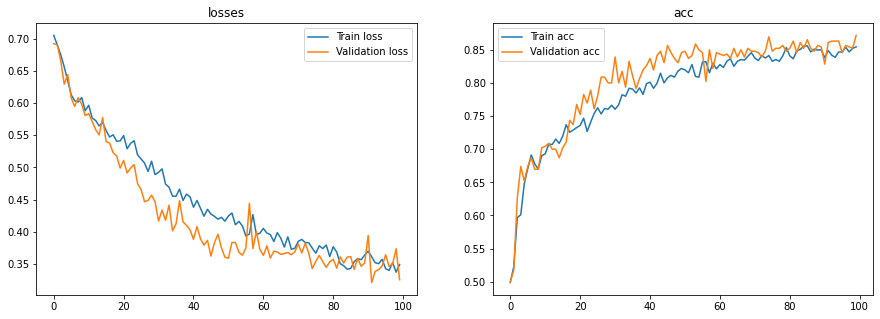

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("losses")
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('acc')
ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()

model.save("car_damage_detection_model.h5")
print("model saved")

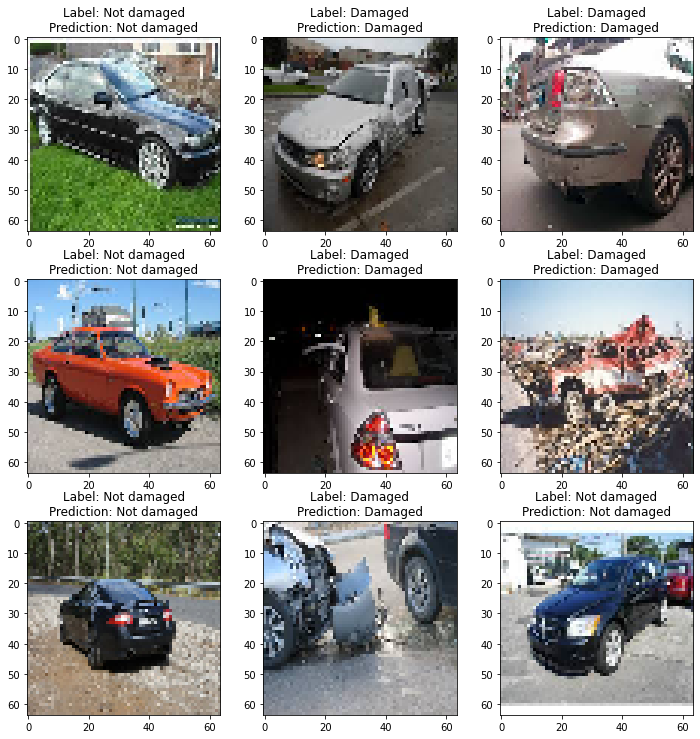

In [20]:
labels = ['damaged','not damaged']
it = iter(test)
batch = next(it)
fig,ax = plt.subplots(3,3,figsize=(10,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.25)
for i in range(3):
    for j in range(3):
        axes = ax[i,j]
        image = batch[0][i*3+j]
        net_input = image.reshape((1, 64, 64, 3))
        truth = np.argmax(batch[1][i*3+j])
        prediction = np.argmax(model.predict(net_input))
        axes.set_title('Label: %s\nPrediction: %s' % (labels[truth].capitalize(), labels[prediction].capitalize()))
        axes.imshow(image)

In [21]:
prediction = pd.DataFrame(columns = ['Image','Predicted'])
prediction

,Image,Predicted


In [72]:
images=[]

for i in range(len(os.listdir(test_dir + '/00-damage'))):
  images.append(test_dir +'/'+'00-damage/'+ os.listdir(test_dir + '/00-damage')[i])

for i in range(len(os.listdir(test_dir + '/01-whole'))):
  images.append(test_dir + '/'+'01-whole/' + os.listdir(test_dir + '/01-whole')[i])

In [73]:
prediction['Image'] = images

In [74]:
predictions = []
labels = ['00-damage','01-whole']
np_images = np.array(images)
for i in range(len(np_images)):
  image = ig.load_img(np_images[i],target_size=(64,64))
  img = np.expand_dims(image,axis=0)
  img.reshape(1,64,64,3)
  pred = np.argmax(model.predict(img))
  predictions.append(labels[pred])

In [75]:
prediction['Predicted'] = predictions
prediction

,Image,Predicted
0,data1a/validation/00-damage/0041.JPEG,00-damage
1,data1a/validation/00-damage/0119.JPEG,01-whole
2,data1a/validation/00-damage/0157.JPEG,00-damage
3,data1a/validation/00-damage/0023.JPEG,01-whole
4,data1a/validation/00-damage/0013.JPEG,01-whole
...,...,...
455,data1a/validation/01-whole/0070.jpg,01-whole
456,data1a/validation/01-whole/0074.jpg,01-whole
457,data1a/validation/01-whole/0170.jpg,01-whole
458,data1a/validation/01-whole/0148.jpg,01-whole


In [76]:
prediction.to_csv("predicted_results.csv")